In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import ExtraTreesRegressor

In [2]:
#importing dataset
df = pd.read_csv(r'car data.csv')

In [40]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [42]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,1k
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,1000
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,1000
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,1000
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1000
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,1000
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,1000
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,1000
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,1000
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,1000


In [4]:
df.shape

(301, 9)

In [5]:
#checking the unique values of the categorical features
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())
print(df['Fuel_Type'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [6]:
#checking for missing or null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [114]:
main_data  = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [115]:
main_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [116]:
main_data['Current_year'] = 2022

C:\Users\USER\AppData\Local\Temp/ipykernel_7292/2061397876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_data['Current_year'] = 2022


In [117]:
main_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022


In [118]:
main_data['Car_age'] = main_data['Current_year'] - main_data['Year']

In [119]:
main_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,Car_age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [120]:
main_data[['Selling_Price', 'Present_Price']] = main_data[['Selling_Price', 'Present_Price']] * 524000

In [121]:
main_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,Car_age
0,2014,1755400.0,2929160.0,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,2489000.0,4998960.0,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,3799000.0,5161400.0,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,1493400.0,2174600.0,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,2410400.0,3599880.0,42450,Diesel,Dealer,Manual,0,2022,8


In [122]:
main_data.drop(['Year', 'Current_year'], axis=1, inplace=True)

In [124]:
main_data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age
0,1755400.0,2929160.0,27000,Petrol,Dealer,Manual,0,8
1,2489000.0,4998960.0,43000,Diesel,Dealer,Manual,0,9
2,3799000.0,5161400.0,6900,Petrol,Dealer,Manual,0,5
3,1493400.0,2174600.0,5200,Petrol,Dealer,Manual,0,11
4,2410400.0,3599880.0,42450,Diesel,Dealer,Manual,0,8


In [125]:
main_data = pd.get_dummies(main_data, drop_first=True)
main_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,1755400.0,2929160.0,27000,0,8,0,1,0,1
1,2489000.0,4998960.0,43000,0,9,1,0,0,1
2,3799000.0,5161400.0,6900,0,5,0,1,0,1
3,1493400.0,2174600.0,5200,0,11,0,1,0,1
4,2410400.0,3599880.0,42450,0,8,1,0,0,1


In [126]:
main_data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Car_age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


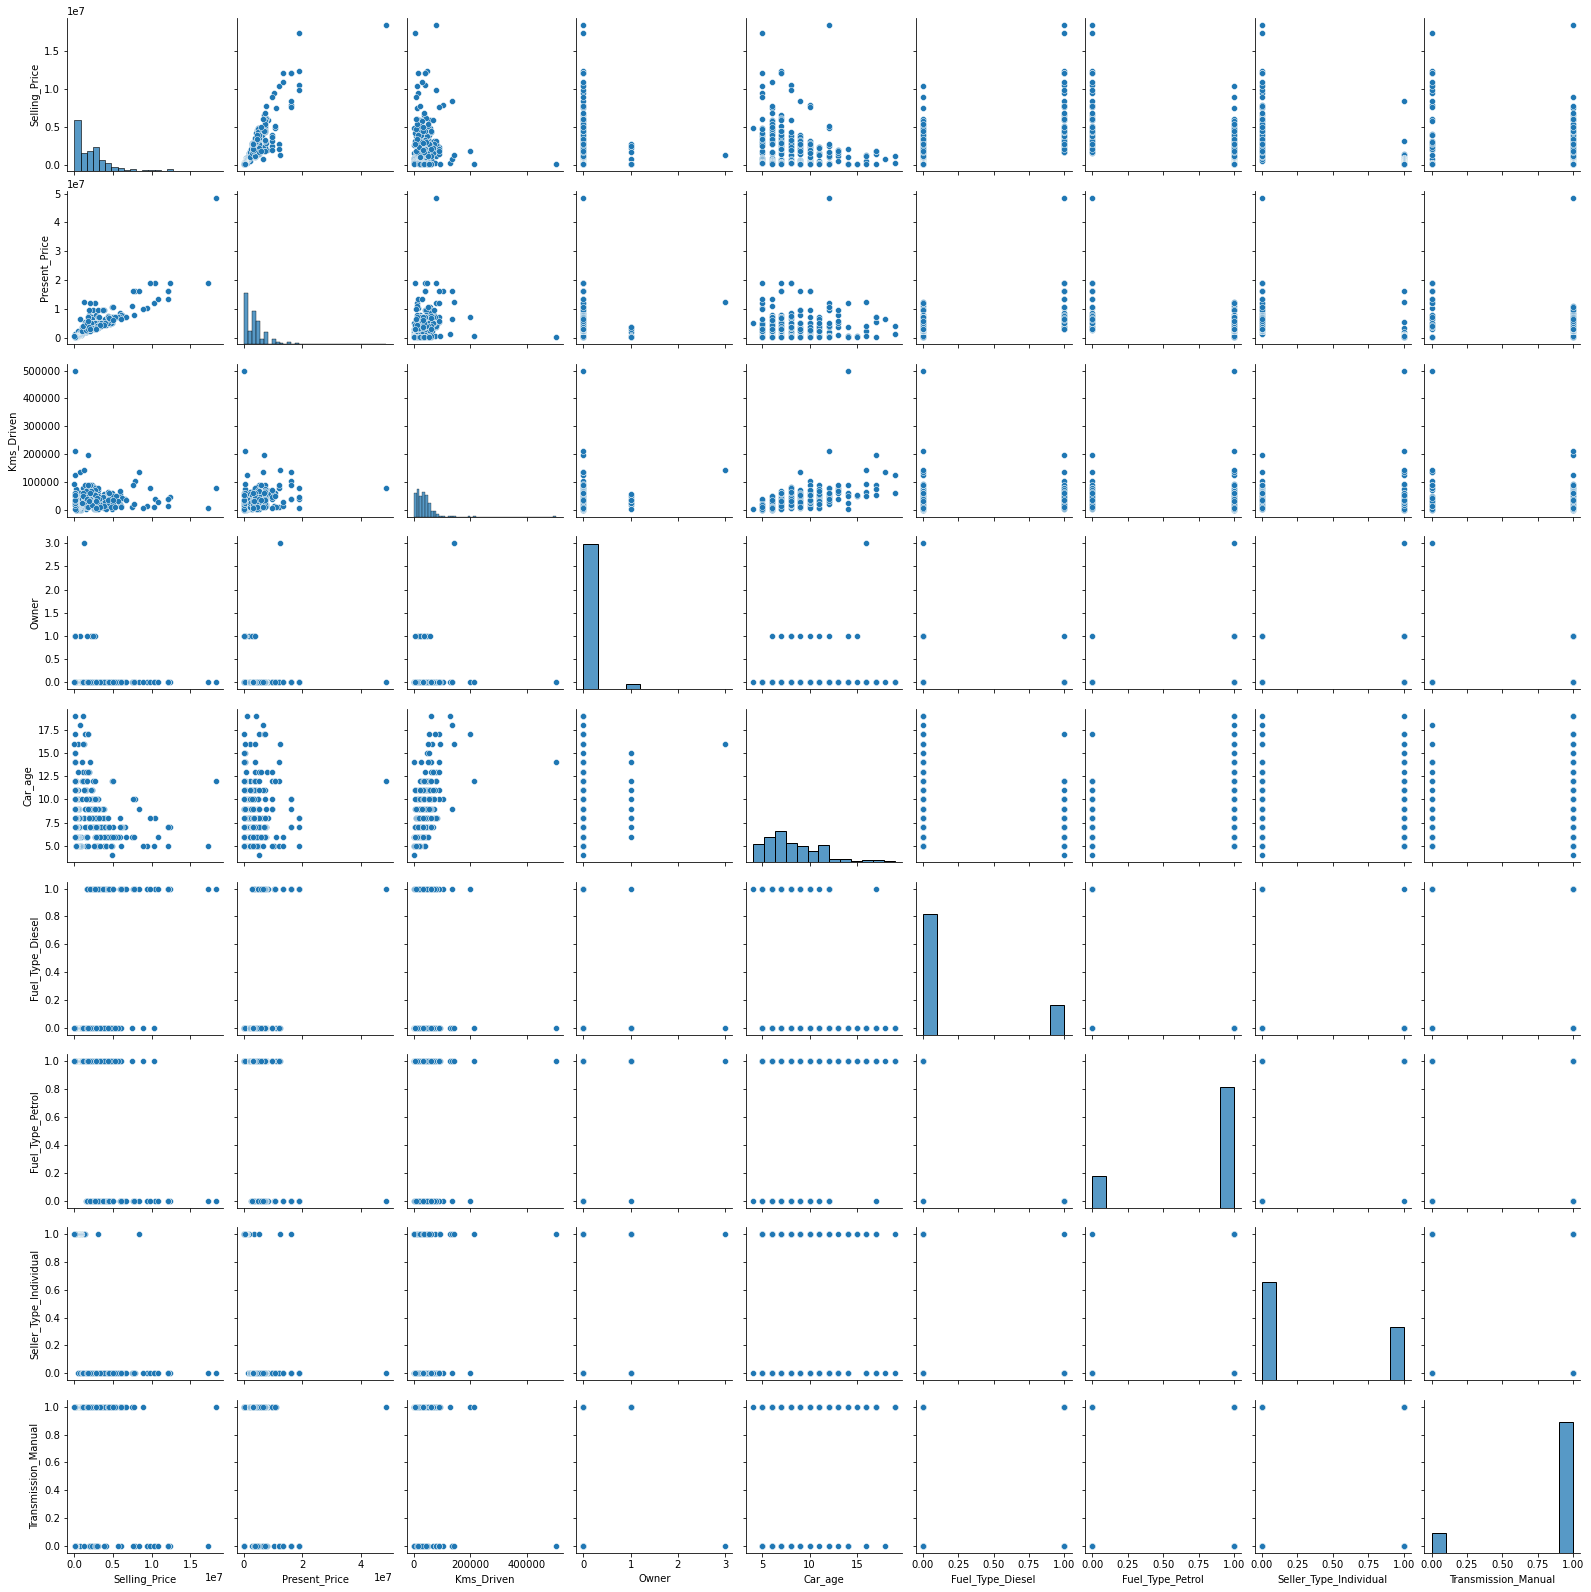

In [127]:
sns.pairplot(main_data)

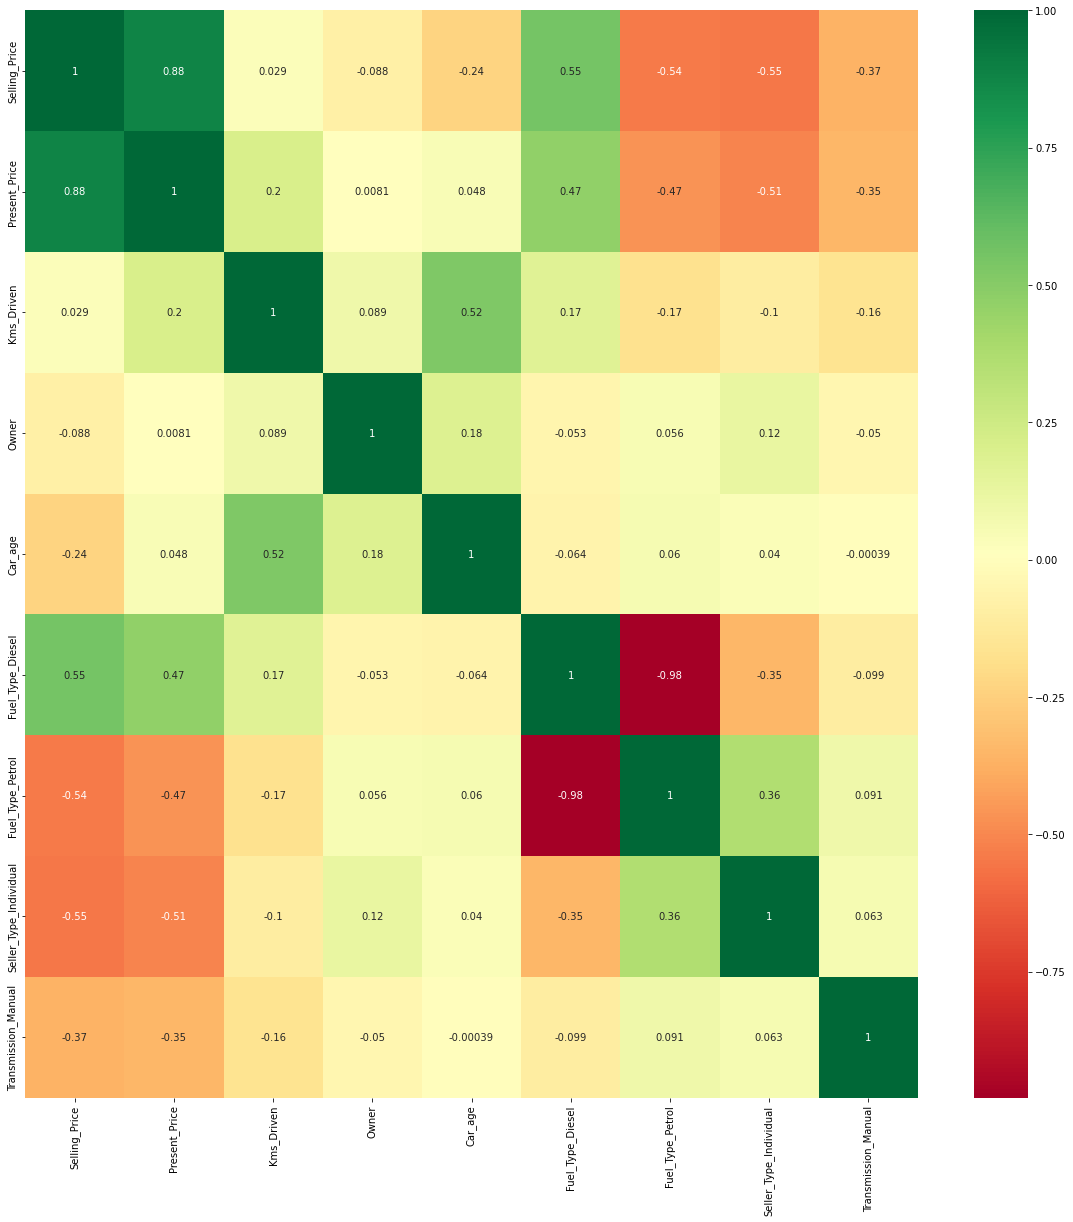

In [129]:
corrmatrix = main_data.corr()
top_features = corrmatrix.index
plt.figure(figsize=(20,20))
g = sns.heatmap(main_data[top_features].corr(), annot=True,cmap="RdYlGn")

In [130]:
X = main_data.iloc[:, 1:]
y = main_data.iloc[:, 0]

In [131]:
model = ExtraTreesRegressor()
print(model.fit(X,y))

ExtraTreesRegressor()


In [132]:
print(model.feature_importances_)

[0.39683168 0.03985472 0.0007505  0.07920079 0.21818466 0.01027375
 0.13095683 0.12394707]


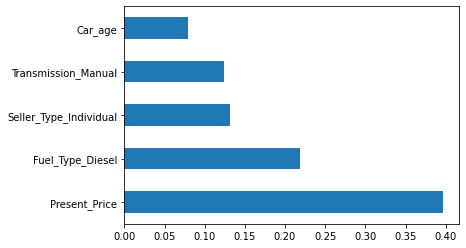

In [133]:
feature_imps = pd.Series(model.feature_importances_, index=X.columns)
feature_imps.nlargest(5).plot(kind='barh')
plt.show()

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [135]:
X_train.shape

(240, 8)

In [136]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [137]:
#hyperparameters
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop=1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [138]:
#randomized search CV

#number of features to consider at every split
max_features = ['auto', 'sqrt']

#maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 12)]

#max_depth.append(None)
#minimum number of samples reqired to split split a node
min_samples_split = [2, 5, 10, 15, 100]

#minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 20]

In [139]:
from sklearn.model_selection import RandomizedSearchCV

In [140]:
# Create the random grid

random_grid = {
    'n_estimators': n_estimators,  
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 7, 9, 11, 14, 16, 18, 20, 23, 25, 27, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 20]}


In [141]:
rf = RandomForestRegressor()

In [142]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, random_state=42, n_jobs=1, verbose=1)

In [143]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 7, 9, 11, 14, 16, 18,
                                                      20, 23, 25, 27, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 20],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [144]:
predictions = rf_random.predict(X_test)

In [145]:
predictions

array([ 2415918.50359618,  2777677.41694688,  3428400.16835404,
         662718.66962443,  3385759.36965432,  2444495.74160604,
        1958509.33993486,   122527.59623482,  1487110.32930492,
       11457844.69559164,   679212.9950153 ,   169245.03813015,
        1495893.34167661,  7985548.2417023 ,  1525805.59964192,
         199094.21166147,  6062405.5681198 ,  5497403.33888479,
        2399796.16132416,   215984.44876092,   583833.41254227,
        1073939.27572055,  2883617.47991985,  3996260.14544357,
         122432.28431952,   216708.22986814, 11162314.69907247,
         151947.89475238,   146957.91008891,  1774694.21036614,
        1567518.15108769,  1745226.53741024,  3985522.92764186,
        3833207.82568118,  2023337.29645696,   386094.88535715,
        2483937.32639304,   350385.18573849,  1488614.97149898,
        1460520.27838082,   212397.2103716 ,   365691.22395531,
         129918.98915297,  2269372.49586629,  3927605.8040391 ,
        2855064.66185308,  1532194.62940

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

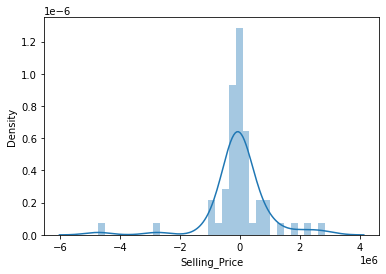

In [146]:
sns.distplot(y_test - predictions)

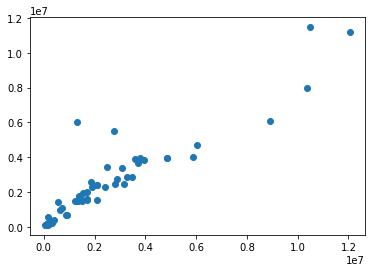

In [147]:
plt.scatter(y_test, predictions)

In [148]:
import pickle
file = open('cp_model.pkl', 'wb')
pickle.dump(rf_random, file)